In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
df=pd.read_csv('btc_2h.csv')

In [3]:
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13203.06,827.053205
1,2018-01-01 07:30:00,13203.00,13611.27,13200.00,13410.03,849.151602
2,2018-01-01 09:30:00,13434.98,13699.00,13322.15,13558.99,745.036375
3,2018-01-01 11:30:00,13539.00,13818.55,13510.00,13570.35,557.178461
4,2018-01-01 13:30:00,13569.98,13735.24,13400.00,13616.99,484.909382
...,...,...,...,...,...,...
17837,2022-01-30 21:30:00,37977.47,38074.76,37751.72,37991.00,1141.092080
17838,2022-01-30 23:30:00,37991.00,38020.39,37442.52,37512.37,2210.156590
17839,2022-01-31 01:30:00,37512.37,37762.60,37351.63,37729.00,1911.983080
17840,2022-01-31 03:30:00,37729.00,38230.00,37625.41,37881.76,2463.470350


In [4]:
df=df.drop(columns=['datetime'])

In [5]:
df

,open,high,low,close,volume
0,13715.65,13715.65,13155.38,13203.06,827.053205
1,13203.00,13611.27,13200.00,13410.03,849.151602
2,13434.98,13699.00,13322.15,13558.99,745.036375
3,13539.00,13818.55,13510.00,13570.35,557.178461
4,13569.98,13735.24,13400.00,13616.99,484.909382
...,...,...,...,...,...
17837,37977.47,38074.76,37751.72,37991.00,1141.092080
17838,37991.00,38020.39,37442.52,37512.37,2210.156590
17839,37512.37,37762.60,37351.63,37729.00,1911.983080
17840,37729.00,38230.00,37625.41,37881.76,2463.470350


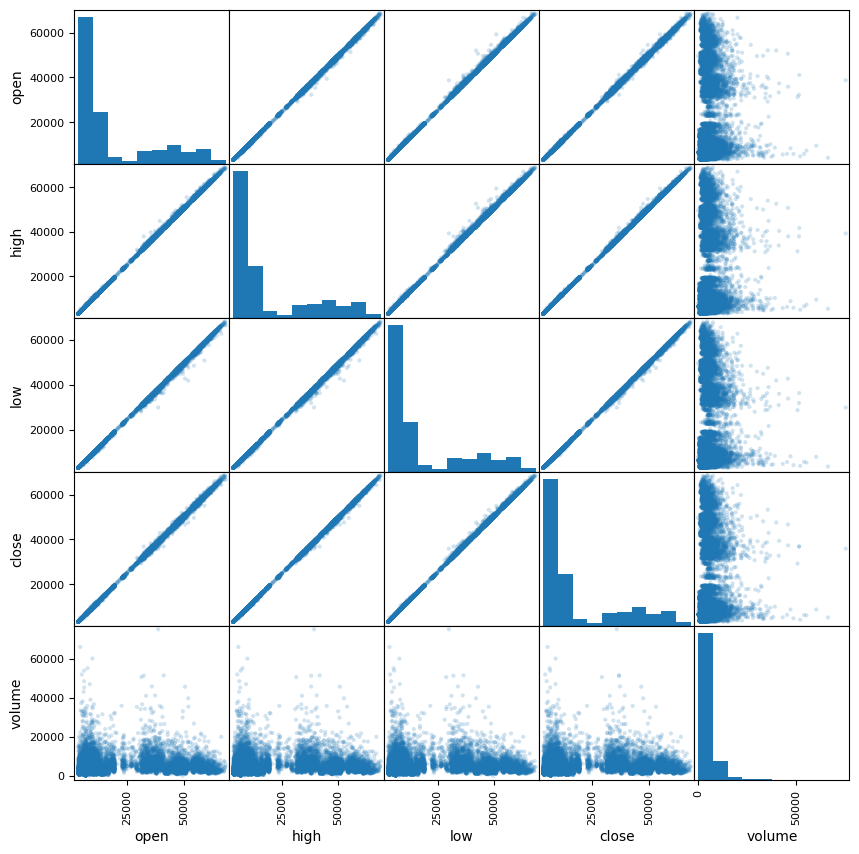

In [68]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.show()

In [6]:
y=df['close']

In [7]:
x=df.drop(columns=['close'])

In [8]:
y

0        13203.06
1        13410.03
2        13558.99
3        13570.35
4        13616.99
           ...   
17837    37991.00
17838    37512.37
17839    37729.00
17840    37881.76
17841    36821.05
Name: close, Length: 17842, dtype: float64

In [9]:
x

,open,high,low,volume
0,13715.65,13715.65,13155.38,827.053205
1,13203.00,13611.27,13200.00,849.151602
2,13434.98,13699.00,13322.15,745.036375
3,13539.00,13818.55,13510.00,557.178461
4,13569.98,13735.24,13400.00,484.909382
...,...,...,...,...
17837,37977.47,38074.76,37751.72,1141.092080
17838,37991.00,38020.39,37442.52,2210.156590
17839,37512.37,37762.60,37351.63,1911.983080
17840,37729.00,38230.00,37625.41,2463.470350


In [10]:
u = np.mean(x, axis = 0)
std = np.std(x, axis = 0)

In [11]:
x=(x-u)/std

In [12]:
x

,open,high,low,volume
0,-0.285054,-0.291337,-0.309650,-0.928597
1,-0.313741,-0.297130,-0.307130,-0.923081
2,-0.300760,-0.292261,-0.300231,-0.949067
3,-0.294939,-0.285627,-0.289621,-0.995953
4,-0.293205,-0.290250,-0.295834,-1.013990
...,...,...,...,...
17837,1.072618,1.060462,1.079577,-0.850218
17838,1.073375,1.057445,1.062113,-0.583399
17839,1.046591,1.043139,1.056980,-0.657817
17840,1.058714,1.069077,1.072443,-0.520176


In [13]:
uy = np.mean(y, axis = 0)
stdy = np.std(y, axis = 0)

In [14]:
y=(y-uy)/stdy

In [15]:
y

0       -0.313803
1       -0.302221
2       -0.293886
3       -0.293250
4       -0.290640
           ...   
17837    1.073273
17838    1.046490
17839    1.058612
17840    1.067160
17841    1.007805
Name: close, Length: 17842, dtype: float64

In [16]:
x=x.values
y=y.values

In [17]:
xtrain=x[:17000]
xtest=x[17000:]
ytrain=y[:17000]
ytest=y[17000:]

In [18]:
xtrain.shape

(17000, 4)

In [19]:

xtrain =xtrain.reshape(xtrain.shape[0],xtrain.shape[1] , 1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1] , 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
266/266 [==============================] - 6s 21ms/step - loss: 2.5817e-04 - val_loss: 8.8333e-04
Epoch 2/50
266/266 [==============================] - 6s 21ms/step - loss: 3.0234e-04 - val_loss: 4.5942e-04
Epoch 3/50
266/266 [==============================] - 6s 21ms/step - loss: 2.5752e-04 - val_loss: 7.1217e-04
Epoch 4/50
266/266 [==============================] - 6s 21ms/step - loss: 2.7670e-04 - val_loss: 4.8029e-04
Epoch 5/50
266/266 [==============================] - 6s 21ms/step - loss: 2.5783e-04 - val_loss: 4.9936e-04
Epoch 6/50
266/266 [==============================] - 5s 20ms/step - loss: 2.2898e-04 - val_loss: 3.9421e-04
Epoch 7/50
266/266 [==============================] - 5s 20ms/step - loss: 2.7815e-04 - val_loss: 4.2427e-04
Epoch 8/50
266/266 [==============================] - 6s 21ms/step - loss: 2.2758e-04 - val_loss: 5.9428e-04
Epoch 9/50
266/266 [==============================] - 6s 21ms/step - loss: 2.6754e-04 - val_loss: 3.8058e-04
Epoch 10/50
266/266

In [47]:
test_predict=model.predict(xtest)

27/27 [==============================] - 0s 7ms/step


In [48]:
test_predict

array([[2.2670662 ],
       [2.2264125 ],
       [2.1893337 ],
       [2.1644561 ],
       [2.1779084 ],
       [2.1805742 ],
       [2.1665738 ],
       [2.221965  ],
       [2.24182   ],
       [2.1992314 ],
       [2.1386752 ],
       [2.1035821 ],
       [2.1194148 ],
       [2.1283052 ],
       [2.153645  ],
       [2.1371295 ],
       [2.1153975 ],
       [2.125139  ],
       [2.1608968 ],
       [2.129035  ],
       [2.1718607 ],
       [2.1765077 ],
       [2.1820476 ],
       [2.1884177 ],
       [2.1833587 ],
       [2.175484  ],
       [2.1343281 ],
       [2.1278853 ],
       [2.126113  ],
       [2.1565306 ],
       [2.1315365 ],
       [2.125663  ],
       [2.1338105 ],
       [2.1358137 ],
       [2.1443472 ],
       [2.1625729 ],
       [2.1610022 ],
       [2.2013097 ],
       [2.1913288 ],
       [2.1773026 ],
       [2.1764083 ],
       [2.1901803 ],
       [2.2242677 ],
       [2.240701  ],
       [2.2598348 ],
       [2.279823  ],
       [2.2640097 ],
       [2.259

In [49]:
for i in range (len(test_predict)):
    print(test_predict[i],ytest[i])

[2.2670662] 2.227736879978303
[2.2264125] 2.1947548602798785
[2.1893337] 2.1584260113824874
[2.1644561] 2.162443773236455
[2.1779084] 2.151495651972824
[2.1805742] 2.1443039701695943
[2.1665738] 2.1470733160491604
[2.221965] 2.2407134673590132
[2.24182] 2.2038300777934774
[2.1992314] 2.1615725120656157
[2.1386752] 2.080624683091652
[2.1035821] 2.0944445528002076
[2.1194148] 2.0948463289856045
[2.1283052] 2.1297465781597116
[2.153645] 2.134052522096519
[2.1371295] 2.112128300726263
[2.1153975] 2.081391862966553
[2.125139] 2.1158640358428484
[2.1608968] 2.0893809417951172
[2.129035] 2.1252050523648927
[2.1718607] 2.1304292619287697
[2.1765077] 2.150684265525992
[2.1820476] 2.1805186653875688
[2.1884177] 2.1748031473407132
[2.1833587] 2.1672606108463364
[2.175484] 2.1391401949065845
[2.1343281] 2.103397222981492
[2.1278853] 2.114385633779035
[2.126113] 2.108851978211642
[2.1565306] 2.1192086267343755
[2.1315365] 2.1153520230160545
[2.125663] 2.082458416461492
[2.1338105] 2.121725603450133

[1.6818647] 1.6855052240201007
[1.6980598] 1.6920438796278454
[1.6877649] 1.6662652928467085
[1.6613923] 1.6596052090603686
[1.6684504] 1.6626812030591511
[1.662027] 1.6548700696720298
[1.6565747] 1.6406053363598663
[1.6548115] 1.654445910412238
[1.6627319] 1.6532053285138748
[1.676594] 1.6677655184080575
[1.6786194] 1.6792010311166474
[1.7296295] 1.748626612968739
[1.8049792] 1.8073810641028418
[1.8095756] 1.7913984298308345
[1.7970477] 1.7922064588165068
[1.8175486] 1.8208120278937785
[1.8260655] 1.8029044492237696
[1.8075725] 1.80193861956361
[1.8057462] 1.8009325003695384
[1.8167918] 1.8161736953021999
[1.825727] 1.8008838171827284
[1.8111944] 1.8034920049266479
[1.804468] 1.79880219126396
[1.8111285] 1.807539983931049
[1.8412607] 1.8082993297299117
[1.8124288] 1.7943121465402505
[1.7961241] 1.791153894743065
[1.8007032] 1.800808833883504
[1.8041947] 1.7925047132828251
[1.8044282] 1.794902500127428
[1.8023713] 1.796703218462535
[1.8030872] 1.7904488278996111
[1.7926557] 1.783486013

In [50]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ytest, test_predict))
print('MSE:', metrics.mean_squared_error(ytest, test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, test_predict)))

MAE: 0.013889151924870634
MSE: 0.0003481611849453979
RMSE: 0.018659077816049696


In [71]:
model.save('model.h5')

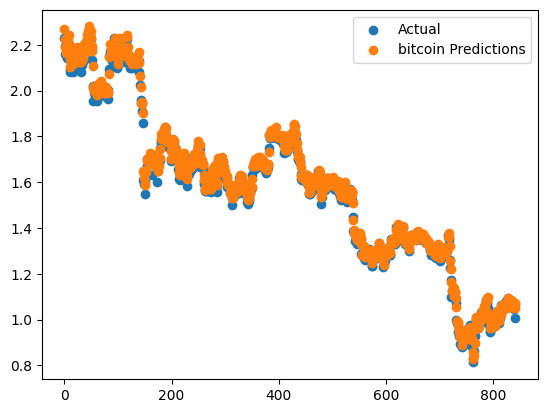

In [70]:

plt.scatter(range(len(ytest)), ytest, label='Actual')
plt.scatter(range(len(test_predict)), test_predict, label='bitcoin Predictions')
plt.legend()
plt.show()


In [55]:
u

open      18809.607143
high      18965.476741
low       18637.751607
volume     4547.656464
dtype: float64

In [56]:
std


open      17870.171733
high      18019.770706
low       17705.048961
volume     4006.694512
dtype: float64

In [57]:
uy

18810.922728393678

In [58]:
stdy

17870.646048645594

In [59]:
u=np.array(u)

In [60]:
std=np.array(std)

In [61]:
u

array([18809.60714326, 18965.4767414 , 18637.75160744,  4547.65646419])

In [62]:
std

array([17870.17173258, 18019.77070617, 17705.048961  ,  4006.6945119 ])

In [63]:
ip=np.array([13715.65,13715.65,13155.38,827.053205])


In [65]:
ip=(ip-u)/std

In [66]:
ip

array([-0.28505362, -0.29133704, -0.30965018, -0.92859669])